<a href="https://colab.research.google.com/github/tetiana-martynenko/projects/blob/main/Project_Bike_visualizations_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demand Analysis for Shared Electric Bicycles in India: Exploring Influencing Factors using visualizations

### 1. Import necessary libraries for project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2. Uploading data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS_course/data/yulu_rental.csv')

### 3. Determination of general info about dataset

In [4]:
display(df[:3])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
display(df.dtypes)

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [6]:
total_bytes = df.memory_usage()
total_mg = total_bytes.sum()/(1024**2)
print(f'Dataset size is {round(total_mg, 3)} mg')

Dataset size is 0.997 mg


### 4. Transforming data

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)


### 5. Determining the relationship between the date and the number of registered users.

In [10]:
df['date'] = df.datetime.dt.date

In [11]:
df_registered_by_date = df.groupby('date')['registered'].sum()

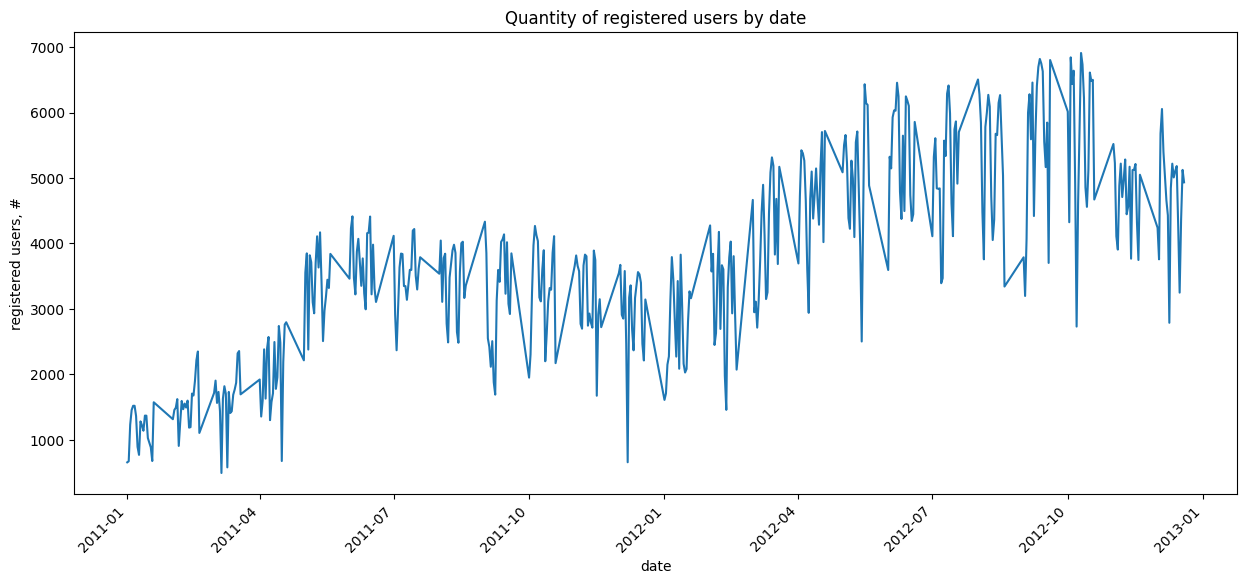

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(df_registered_by_date)
plt.xticks(rotation=45, ha='right')
plt.title("Quantity of registered users by date")
plt.xlabel("date")
plt.ylabel("registered users, #");

Conclusions:
* Based on the obtained data, a positive trend in the growth of the number of customers compared to 2011 is observed. This indicates the company's development and the increasing popularity of its services.
* Summer and autumn are the peak seasons for using electric bicycles, while demand drops in winter. This can be explained by unfavorable weather conditions that complicate the use of open transport.
* The highest demand is observed at 8:00 AM and 6:00 PM, indicating the brand's popularity for commuting to and from work.

Recommendations:
* Optimize the number of available bicycles during peak hours and seasons.
*  Plan marketing campaigns targeting the winter period to stimulate demand during this time.
* Develop strategies for expanding bike-sharing zones, taking into account peak hours and seasonal activity.

### 6. In the continuation of our research, it is necessary to examine the relationship between perceived and actual temperature to determine whether it affects user behavior.

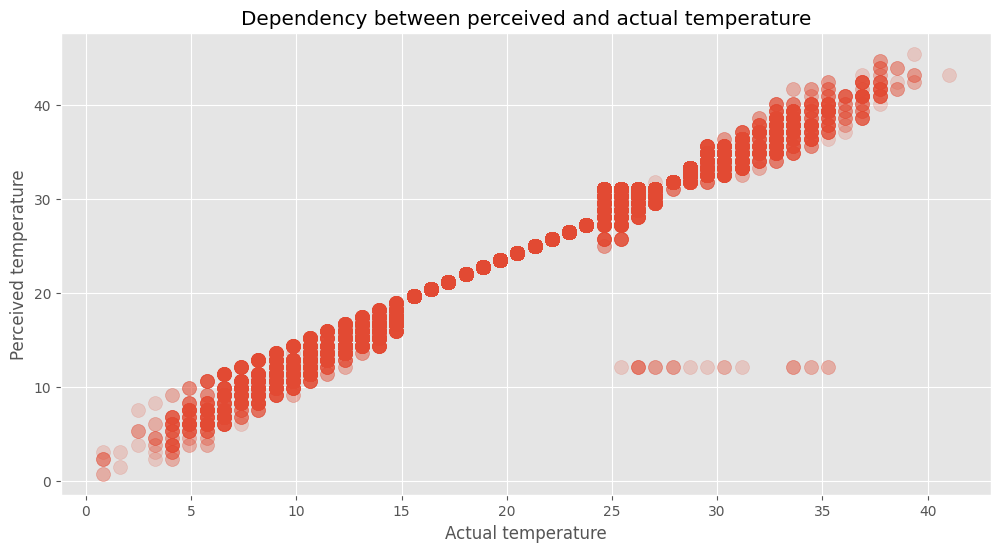

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.scatter(df.temp, df.atemp, alpha=0.2, s = 100)
plt.title("Dependency between perceived and actual temperature")
plt.xlabel("Actual temperature")
plt.ylabel("Perceived temperature");

Conclusions:

* There is a strong linear relationship between actual and perceived temperature, with most frequent ranges being 5–15°C and 25–35°C.
* Deviations, such as actual 25°C being perceived as 12°C, are likely influenced by factors like humidity and wind.
* While the general trend is linear, non-linear patterns and anomalies suggest that perceived temperature may vary irregularly under extreme conditions or due to data inaccuracies.

### 7. The next step is to define distribution of registered users quantity

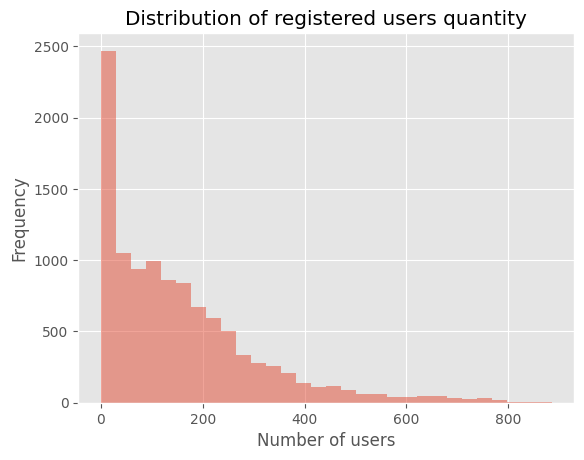

In [19]:
plt.style.use('ggplot')
plt.hist(df.registered, bins=30, alpha = .5)
plt.xlabel('Number of users')
plt.ylabel('Frequency')
plt.title('Distribution of registered users quantity');

Conclusions:

1. The distribution shows that most values are concentrated on the left side of the graph, indicating that a significant portion of hours has a low number of recorded trips, including zero.

2. This distribution may indicate the system's potential to serve customers, i.e., its capacity. During off-peak hours, bicycles are either idle or insufficient in the required locations, limiting their availability for other users.

3. The distribution resembles an exponential curve, where values decrease rapidly as the number of registered users increases.

Possible factors contributing to this distribution include:
* Seasonality and weather
* Work schedules
* Station locations

This insight highlights the need for optimizing bicycle availability during peak periods and ensuring efficient resource allocation to meet user demand effectively.

### 8. Let's analyze the zero activity of registered users by day of the week.

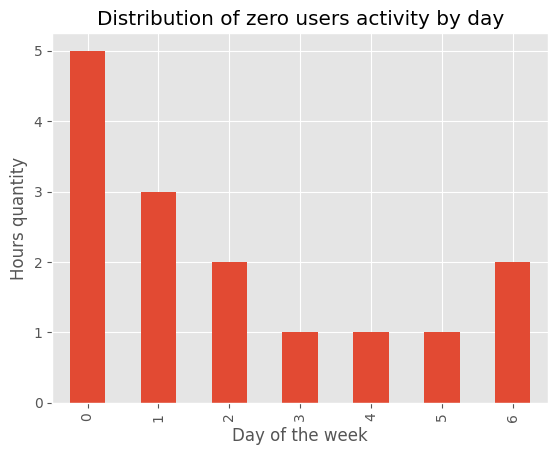

In [22]:
df['datetime'] = pd.to_datetime(df.datetime)
df['dayofweek'] = df.datetime.dt.day_of_week

zero = df[df.registered == 0]
data_for_bar = zero.groupby('dayofweek')['registered'].size()

data_for_bar.plot.bar()
plt.title('Distribution of zero users activity by day')
plt.xlabel('Day of the week')
plt.ylabel('Hours quantity');

### 9. Let's analyze the total number of registered users by different weather conditions.

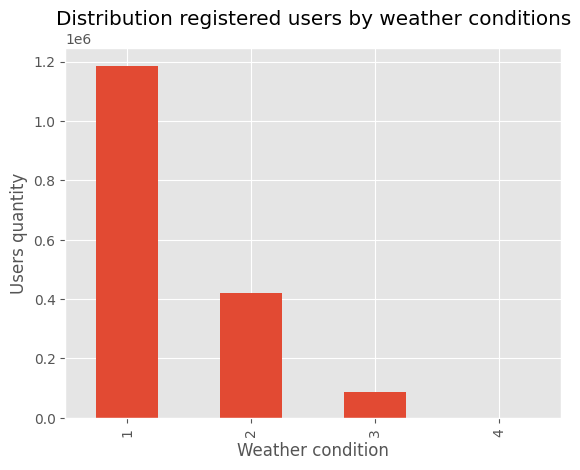

In [25]:
data_for_hist = df.groupby('weather')['registered'].sum()
data_for_hist.T.plot.bar()
plt.title('Distribution registered users by weather conditions')
plt.xlabel('Weather condition')
plt.ylabel('Users quantity');


We have the following description of the weather column:
weather:
1. Clear, Few clouds, Partly cloudy
2. Fog + Cloudy, Fog + Broken clouds, Fog + Few clouds, Fog
3. Light snow, Light rain + Thunderstorm + Scattered clouds, Light rain +  Scattered clouds
4. Heavy rain + Ice pellets + Thunderstorm + Fog, Snow + Fog

Overall, the higher the weather condition indicator, the fewer bicycles are rented. We observe that the total for weather condition #4 is 0, which makes sense, as people are unlikely to rent bicycles under such severe weather conditions.

### 10. Let's define the impact of humidity to users.

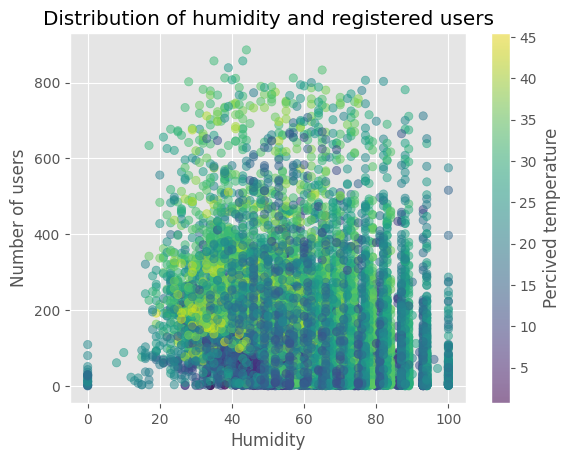

In [26]:
col_x = 'humidity'
col_y = 'registered'
color_feature = 'atemp'


plt.scatter(df[col_x], df[col_y], alpha=0.5, c = df[color_feature])
plt.title('Distribution of humidity and registered users')
plt.xlabel('Humidity')
plt.ylabel('Number of users')
plt.colorbar(label="Percived temperature");

Conclusions:

* Most data points cluster around 40–60% humidity, indicating higher activity levels at moderate humidity levels.
* Few users are present when humidity approaches 0% or 100%.
* Warmer perceived temperatures (yellow) are more frequent at moderate humidity levels, while cooler temperatures (purple) dominate at higher humidity.
* At a given humidity, the number of users varies significantly, suggesting other factors (time of day or weather) might also influence user behavior.

This indicates that moderate humidity paired with comfortable perceived temperatures fosters the most activity.

### 11. Let's check our conclusions including weather condition

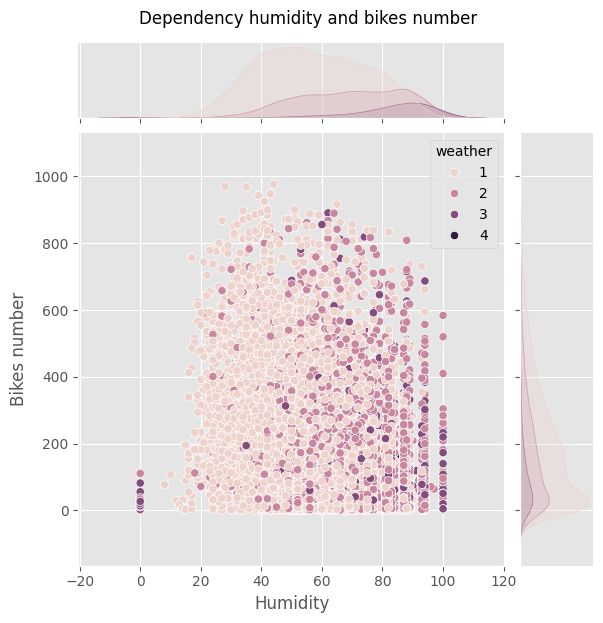

In [29]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather')
plt.suptitle('Dependency humidity and bikes number', y=1.03)
plt.xlabel('Humidity')
plt.ylabel('Bikes number');

Conclutions:
* Bike rentals increase with humidity levels between 20-95%, while values of 0 and 100 appear to be data errors.
* Rentals are most common in clear and slightly cloudy weather (category 1), which boosts demand for the service.
* As weather worsens and humidity rises, the number of rentals decreases.
* There is a large spread of data points, particularly with more rentals at lower humidity levels.
* Outliers, such as rentals in poor weather or high humidity, should be explored separately.

### 12. Determine the dependence of the number of registered and unregistered customers on seasonality in warm period

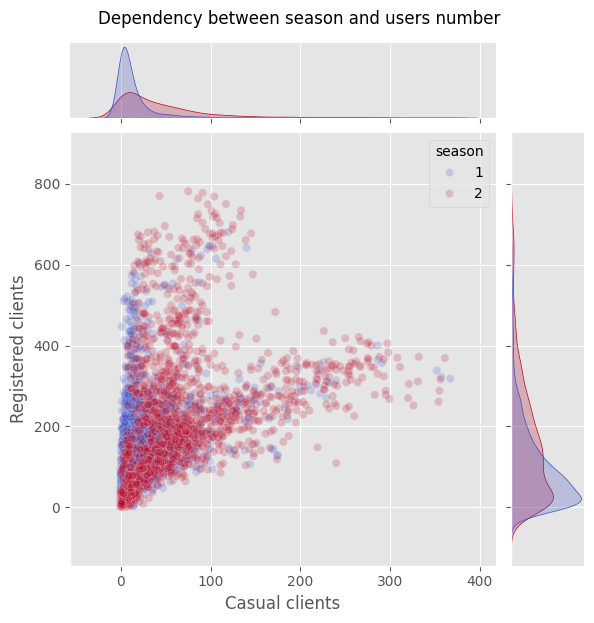

In [32]:
spring_summer = df[(df.season == 1) | (df.season == 2) ]


sns.jointplot(data=spring_summer, x='casual', y='registered',
             hue='season', alpha=.2, palette='coolwarm' )
plt.suptitle('Dependency between season and users number', y=1.03)
plt.xlabel('Casual clients')
plt.ylabel('Registered clients');


Conclusion:
* There is a clear trend that with the onset of summer, the number of informal
users increases compared to registered ones, for whom the peak occurs in spring.
This can be explained by the fact that summer is the season of vacations and holidays, which leads to a decrease in the share of registered clients.

### 13. Identify special behavior of users during the holidays

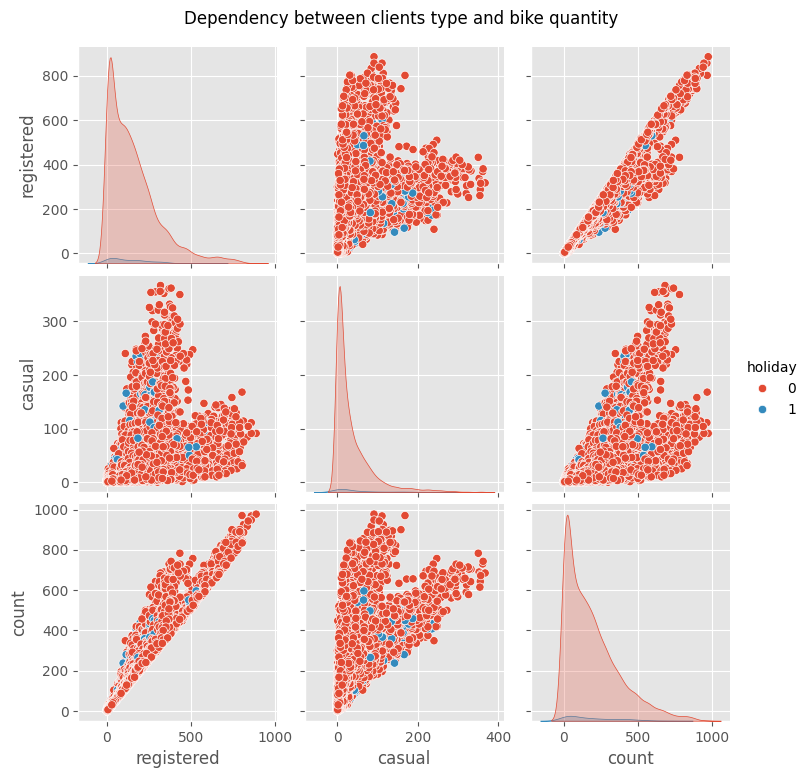

In [33]:
data_df = df[['registered', 'casual', 'count','holiday']]
sns.pairplot(data=data_df, hue='holiday')
plt.suptitle('Dependency between clients type and bike quantity', y=1.03)
plt.xlabel('Weather condition')
plt.ylabel('Humidity');

Conclusion:
* From the graphs, we can't draw a conclusion about the peculiarities of user behavior on light days. Perhaps we need more data on these days to begin to see patterns.